# Assignment 2

Due EOD Thursday Oct 2nd

## Question 1

A nuclear fuel pellet is a cylinder, 1.5 cm in lenth and 1 cm in diameter. Assume the surface temperature is 300 C everywhere. Given temperature probe data below, determine the radial temperature profile in the middle of a nuclear fuel pellet (i.e.: T(r, z = 0.75)) using radial basis functions.


In [ ]:
import numpy as np

# 20 data points presented in columns: | x | y | z | T |, measurements in cm

data = np.array([
    [5.1690e-02, 2.3766e-01, 6.7059e-01, 5.2645e+02],
    [1.1353e-01, 9.4708e-02, 5.3856e-01, 5.5201e+02],
    [1.6676e-01, 1.4358e-01, 4.6936e-01, 5.0802e+02],
    [1.3610e-01, 3.7207e-02, 2.1694e-01, 4.3663e+02],
    [8.9225e-02, 3.7293e-01, 1.1270e+00, 3.9234e+02],
    [1.9001e-01, 3.7240e-01, 8.4774e-01, 3.8872e+02],
    [5.4849e-02, 3.5425e-01, 5.7478e-01, 4.3784e+02],
    [1.7001e-01, 2.0241e-01, 1.2960e+00, 4.0159e+02],
    [2.0606e-01, 3.1594e-01, 6.4077e-01, 4.2652e+02],
    [2.5382e-01, 2.5859e-01, 4.8610e-01, 4.2481e+02],
    [5.6038e-02, 8.2231e-02, 4.2029e-01, 5.3244e+02],
    [3.1242e-01, 8.0489e-02, 1.1530e+00, 4.2453e+02],
    [6.0186e-02, 4.4891e-01, 3.9941e-01, 3.4207e+02],
    [1.5070e-01, 3.4794e-01, 1.5595e-01, 3.4750e+02],
    [1.8215e-01, 3.4388e-01, 1.0478e+00, 3.9963e+02],
    [1.1633e-01, 4.1011e-01, 5.5001e-01, 3.7611e+02],
    [1.2377e-01, 3.3703e-01, 3.7672e-02, 3.1423e+02],
    [4.6378e-02, 3.3653e-01, 1.4434e+00, 3.2345e+02],
    [2.9063e-02, 3.2584e-02, 2.3977e-01, 4.5993e+02],
    [2.1162e-02, 3.8590e-01, 2.5905e-01, 3.6901e+02]
])

Consider what you know about this system. What extra information do you have in terms of

### a) type(s) of symmetry?

The pellet has cylindrical (axial) symmetry since it is shaped like a cylinder and the boundary conditions are uniform, so the temperature does not vary with the angular coordinate. At the mid-plane (z=0.75cm), the system also shows radial symmetry, which means that the temperature distribution only depends on the distance from the center.

### b) Boundary conditions?

The boundary condition is that the surface of the pellet is 300 °C everywhere, as mentioned in the problem. To add on, because of radial symmetry, the centerline (r = 0) should have a temperature gradient of zero in the radial direction.

## c) Plot the best guess of the radial temperature profile

Note: RBFs will fail with a linear solver error if two data points exactly overlap.

Answer:
To determine the radial temperature profile, the data was transformed into cylindrical coordinates by calculating the radial distance. Since the pellet is symmetric about its axis, the temperature only varies with radius and axial position. At the mid-plane, RBF interpolation was applied to fit a smooth temperature distribution, allowing the radial temperature profile of the fuel pellet to be estimated.

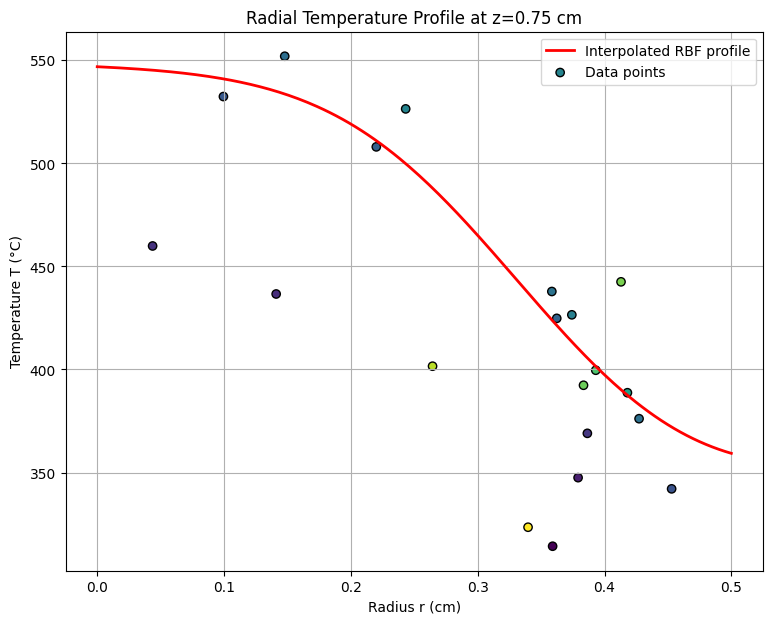

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf

# Load the data: [x, y, z, T]
data = np.array([
    [5.1690e-02, 2.3766e-01, 6.7059e-01, 5.2645e+02],
    [1.1353e-01, 9.4708e-02, 5.3856e-01, 5.5201e+02],
    [1.6676e-01, 1.4358e-01, 4.6936e-01, 5.0802e+02],
    [1.3610e-01, 3.7207e-02, 2.1694e-01, 4.3663e+02],
    [8.9225e-02, 3.7292e-01, 1.1270e+00, 3.9234e+02],
    [1.9001e-01, 3.7240e-01, 8.4774e-01, 3.8872e+02],
    [5.4849e-02, 3.5425e-01, 5.7478e-01, 4.3784e+02],
    [1.7012e-01, 2.0241e-01, 1.2966e+00, 4.0159e+02],
    [2.0060e-01, 3.1594e-01, 6.4077e-01, 4.2652e+02],
    [2.5382e-01, 2.5859e-01, 4.8610e-01, 4.2481e+02],
    [5.6038e-02, 8.2231e-02, 4.2029e-01, 5.3244e+02],
    [2.5362e-01, 3.2598e-01, 1.1583e+00, 4.4253e+02],
    [6.0186e-02, 4.4891e-01, 3.9941e-01, 3.4207e+02],
    [1.5070e-01, 3.4794e-01, 1.5595e-01, 3.4750e+02],
    [1.8215e-01, 3.4838e-01, 1.0478e+00, 3.9963e+02],
    [1.1638e-01, 4.1110e-01, 5.5081e-01, 3.7611e+02],
    [1.2377e-01, 3.3708e-01, 3.7672e-02, 3.1423e+02],
    [4.6378e-02, 3.3653e-01, 1.4434e+00, 3.2345e+02],
    [2.9063e-02, 3.2584e-02, 2.3977e-01, 4.5993e+02],
    [2.1162e-02, 3.8590e-01, 2.5905e-01, 3.6901e+02]
])

# Extract columns
x, y, z, T = data[:,0], data[:,1], data[:,2], data[:,3]

# Convert (x,y) to cylindrical radius
r = np.sqrt(x**2 + y**2)

# Interpolation function (RBF in 2D: r,z → T)
rbf = Rbf(r, z, T, function='multiquadric')

# Generate radial points at mid-plane (z=0.75 cm)
r_vals = np.linspace(0, 0.5, 200)
z_mid = np.full_like(r_vals, 0.75)
T_vals = rbf(r_vals, z_mid)

# Plot
plt.figure(figsize=(9,7))
plt.plot(r_vals, T_vals, 'r-', lw=2, label="Interpolated RBF profile")
plt.scatter(r, T, c=z, cmap='viridis', edgecolor='k', label="Data points")
plt.xlabel("Radius r (cm)")
plt.ylabel("Temperature T (°C)")
plt.title("Radial Temperature Profile at z=0.75 cm")
plt.legend()
plt.grid(True)
plt.show()

The data shows that the maximum temperature occurs at the pellet centerline (r=0) at about 550 °C and decreases smoothly toward the surface, where it approaches the boundary condition of 300 °C. The curve is nearly parabolic, consistent with theoretical expectations.

# Question 2

You run an experiment and obtain the following data:

| x | y1 | y2 | y3 | y4 | y5 |
|---|---|---|---| --- | --- |
| 0.00 | -29.49 | -2.14 | 15.88 | 22.69 | 28.53 |
| 1.11 | 2.83 | 18.02 | -25.45 | -32.45 | 7.50 |
| 2.22 | 1.97 | -10.49 | -0.18 | -32.10 | -40.31 |
| 3.33 | -38.09 | -46.16 | -7.87 | -33.97 | -38.39 |
| 4.44 | -3.97 | -32.22 | -33.95 | -11.07 | -32.47 |
| 5.56 | 4.45 | -10.88 | 20.43 | 6.57 | -8.49 |
| 6.67 | 50.22 | 51.29 | 80.02 | 66.15 | 84.90 |
| 7.78 | 164.11 | 190.26 | 160.94 | 182.35 | 163.18 |
| 8.89 | 331.75 | 306.51 | 278.40 | 302.13 | 335.44 |
| 10.00 | 517.06 | 483.20 | 476.73 | 512.16 | 500.64 |



In [ ]:
import numpy as np

# Define the table as a list of lists
d = np.array([
    [0.00, -29.49, -2.14, 15.88, 22.69, 28.53],
    [1.11, 2.83, 18.02, -25.45, -32.45, 7.50],
    [2.22, 1.97, -10.49, -0.18, -32.10, -40.31],
    [3.33, -38.09, -46.16, -7.87, -33.97, -38.39],
    [4.44, -3.97, -32.22, -33.95, -11.07, -32.47],
    [5.56, 4.45, -10.88, 20.43, 6.57, -8.49],
    [6.67, 50.22, 51.29, 80.02, 66.15, 84.90],
    [7.78, 164.11, 190.26, 160.94, 182.35, 163.18],
    [8.89, 331.75, 306.51, 278.40, 302.13, 335.44],
    [10.00, 517.06, 483.20, 476.73, 512.16, 500.64]
])

## a) Determine the best cubic polynomial fit to this data with the uncertainty

The five measurements at each x were averaged, and the variation was found using the standard deviation. A cubic polynomial was then fitted to the averaged data using least squares regression. The uncertainties were taken from the covariance matrix.


Best cubic polynomial fit:
P(x) = 0.8815x^3 + -2.5884x^2 + -13.0916x + 9.5258

Uncertainty of the coefficients:
x^3 coefficient: 0.8815 ± 0.0656
x^2 coefficient: -2.5884 ± 0.9997
x coefficient:   -13.0916 ± 4.1592
Constant term:   9.5258 ± 4.5400


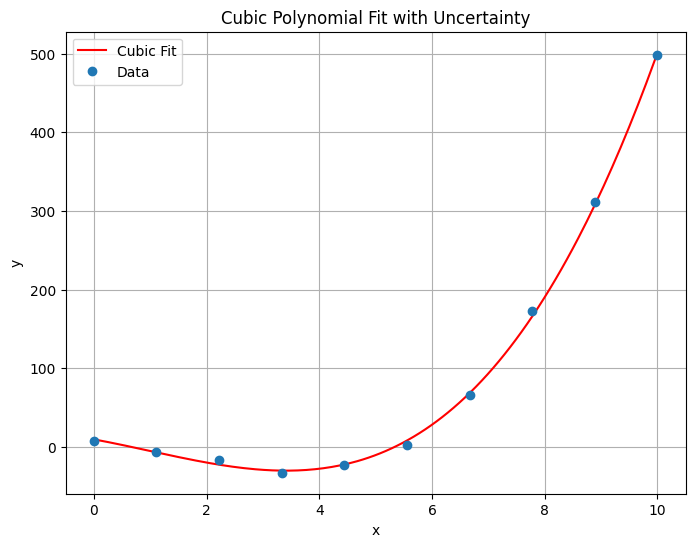

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Data table
d = np.array([
    [0.00, -29.49, -2.14, 15.88, 22.69, 28.53],
    [1.11, 2.83, 18.02, -25.45, -32.45, 7.50],
    [2.22, 1.97, -10.49, -0.18, -32.10, -40.31],
    [3.33, -38.09, -46.16, -7.87, -33.97, -38.39],
    [4.44, -3.97, -32.22, -33.95, -11.07, -32.47],
    [5.56, 4.45, -10.88, 20.43, 6.57, -8.49],
    [6.67, 50.22, 51.29, 80.02, 66.15, 84.90],
    [7.78, 164.11, 190.26, 160.94, 182.35, 163.18],
    [8.89, 331.75, 306.51, 278.40, 302.13, 335.44],
    [10.00, 517.06, 483.20, 476.73, 512.16, 500.64]
])

# Extract x and y-values
x_data = d[:, 0]
y_data = d[:, 1:]

# Compute mean for each x
y_mean = np.mean(y_data, axis=1)

# Fit cubic polynomial (degree = 3) with covariance matrix
coeffs, cov_matrix = np.polyfit(x_data, y_mean, 3, cov=True)
coeff_stdev = np.sqrt(np.diag(cov_matrix))

# Polynomial function
poly_fit = np.poly1d(coeffs)

# Print results
print("Best cubic polynomial fit:")
print(f"P(x) = {coeffs[0]:.4f}x^3 + {coeffs[1]:.4f}x^2 + {coeffs[2]:.4f}x + {coeffs[3]:.4f}")
print("\nUncertainty of the coefficients:")
print(f"x^3 coefficient: {coeffs[0]:.4f} ± {coeff_stdev[0]:.4f}")
print(f"x^2 coefficient: {coeffs[1]:.4f} ± {coeff_stdev[1]:.4f}")
print(f"x coefficient:   {coeffs[2]:.4f} ± {coeff_stdev[2]:.4f}")
print(f"Constant term:   {coeffs[3]:.4f} ± {coeff_stdev[3]:.4f}")

# Generate smooth fit curve
x_fit = np.linspace(x_data.min(), x_data.max(), 200)
y_fit = poly_fit(x_fit)

# Plot
plt.figure(figsize=(8, 6))
plt.errorbar(x_data, y_mean, fmt='o', capsize=5, label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Cubic Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Polynomial Fit with Uncertainty')
plt.legend()
plt.grid(True)
plt.show()


## b) Your manager thinks this should be a quadratic. Which do you think it should be and why?

A quadratic polynomial would not be enough as the data shows two distinct changes in curvature: it bends downward at smaller x values and then bends upward at larger x values. A quadratic can only represent a single curve direction (always concave up or always concave down), whereas a cubic polynomial allows for an inflection point. This makes the cubic fit more appropriate, as it better matches the trend in the graph.